In [2]:
using ReinforcementLearningCore
using RLIntro

In [4]:
const GridWorldLinearIndices = LinearIndices((4,4))
const GridWorldCartesianIndices = CartesianIndices((4,4))

isterminal(s::CartesianIndex{2}) = s == CartesianIndex(1,1) || s == CartesianIndex(4,4) 

function nextstep(s::CartesianIndex{2}, a::CartesianIndex{2})
    ns = s + a
    if isterminal(s) || ns[1] < 1 || ns[1] > 4 || ns[2] < 1 || ns[2] > 4
        ns = s
    end
    r = isterminal(s) ? 0. : -1.0
    [(nextstate=GridWorldLinearIndices[ns], reward=r, prob=1.0)]
end

const GridWorldActions = [CartesianIndex(-1, 0),
                          CartesianIndex(1,0),
                          CartesianIndex(0, 1),
                          CartesianIndex(0, -1)]

const GridWorldEnvModel = DeterministicDistributionModel([nextstep(GridWorldCartesianIndices[s], a) for s in 1:16, a in GridWorldActions]);

In [6]:
V, π = TabularApproximator(n_state=16), TabularRandomPolicy(fill(0.25, 4, 16))
policy_evaluation!(V=V, π=π, model=GridWorldEnvModel, γ=1.0)

TabularApproximator{1,Array{Float64,1}}([0.0, -13.999312424461952, -19.999011518162757, -21.998911992496346, -13.999312424461952, -17.999156254598965, -19.99908388638086, -19.99909436158647, -19.999011518162757, -19.99908388638086, -17.999226967843388, -13.999422844683945, -21.99891199249635, -19.999094361586472, -13.999422844683945, 0.0])

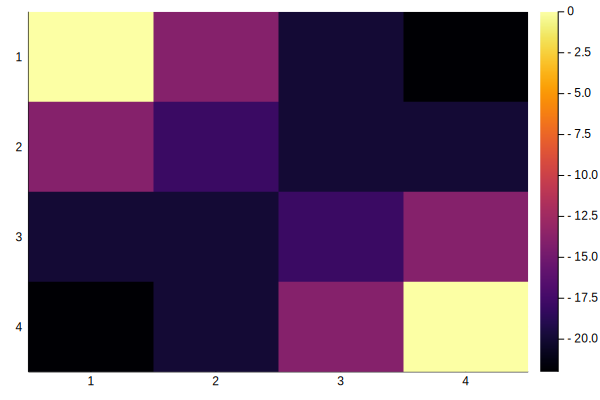

In [7]:
using Plots
heatmap(1:4, 1:4, reshape(V.table, 4,4), yflip=true)

And you can compare it with the figure on the book:

![](img/fig_4_1.png)